## Exercise 7 - Data visualization
- Different data sources will be utilized in this exercise.
- **Important**: Remember to adjust the size of each visualized graph using figsize parameter for plot method for better viewing experience!

1 Read the earthquakes.csv file and save its content into a variable. Then use bar chart to visualize magnitude values being 8.2 or over so that date values will be presented in x-axle and magnitude in y-axle.

2 Read the gamedata.json file to a new variable. Visualize the data with pie chart so that share count will be counted for each Steam rating (in other words how many percentage out of all games have received which rating, for example Very Positive rating).

3 Use the same game_data.json as above and create a scatter plot where you compare the relationships for metacriticScore and salePrice.

4 Use earthquake data you read earlier (the unfiltered original data) and create a scatter plot for magnitude values using Longitude and Latitude values for x- and y-axles correspondingly. In addition, use colormap for magnitude values.

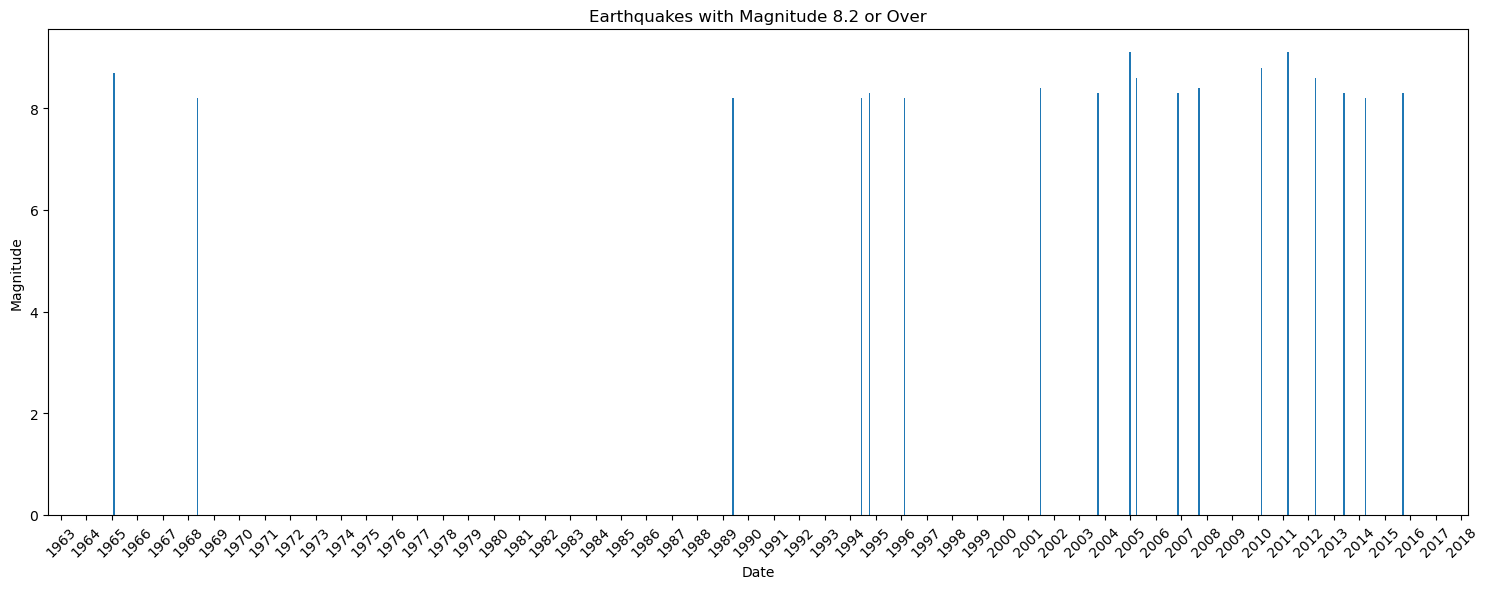

In [11]:
# E1

import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter

# Dataframe
earthquake_data = pd.read_csv("data_files/earthquakes.csv")

# Converting date to usable format
earthquake_data['Date'] = pd.to_datetime(earthquake_data['Date'], format='mixed')

# Filter earthquakes with magnitude 8.2 or over
high_magnitude_earthquakes = earthquake_data[earthquake_data['Magnitude'] >= 8.2]

# Create the bar chart
plt.figure(figsize=(15, 6))  # Readability
plt.bar(high_magnitude_earthquakes['Date'], high_magnitude_earthquakes['Magnitude'], width=21)

# Add labels
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Earthquakes with Magnitude 8.2 or Over')

# Configure x-axis ticks and labels
plt.gca().xaxis.set_major_locator(YearLocator())  # Set major ticks for every year
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format labels as YYYY

# Rotate x-axis for readability
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

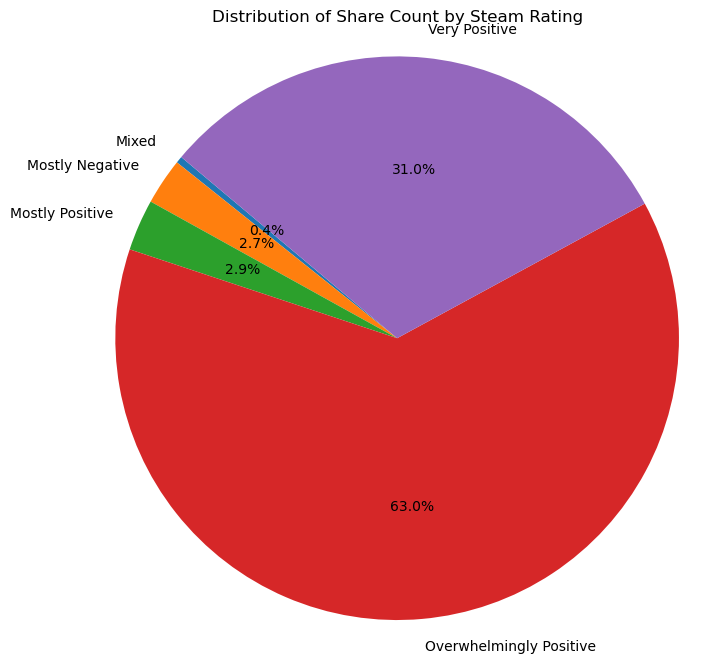

In [83]:
# E2

import pandas as pd
import matplotlib.pyplot as plt

# Dataframe
games_data = pd.read_json("data_files/gamedata.json")

# Group the data
rating_share_count = games_data.groupby('steamRatingText')['steamRatingCount'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(rating_share_count, labels=rating_share_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Share Count by Steam Rating')
plt.axis('equal')  # Makes sure that pie is a circle


plt.show()

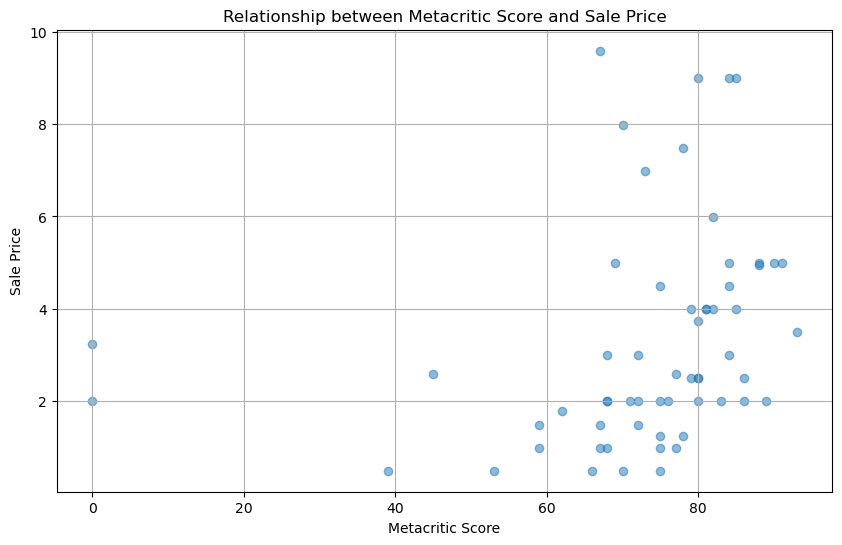

In [3]:
# E3

import pandas as pd
import matplotlib.pyplot as plt

# Dataframe
games_data = pd.read_json("data_files/gamedata.json")

metacritic_scores = games_data['metacriticScore']
sale_prices = games_data['salePrice']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(metacritic_scores, sale_prices, alpha=0.5)
plt.title('Relationship between Metacritic Score and Sale Price')
plt.xlabel('Metacritic Score')
plt.ylabel('Sale Price')
plt.grid(True)

plt.show()

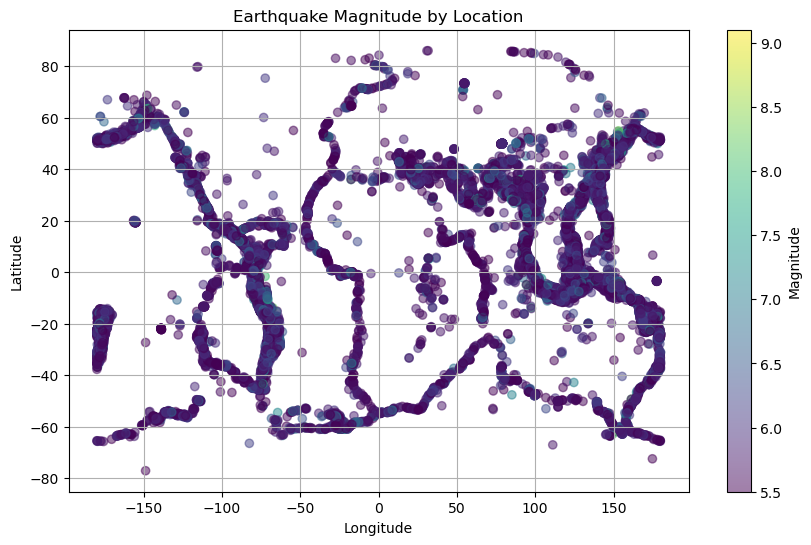

In [12]:
# E4

import pandas as pd
import matplotlib.pyplot as plt

# Dataframe
earthquake_data = pd.read_csv("data_files/earthquakes.csv")

# Extract required values
longitude = earthquake_data['Longitude']
latitude = earthquake_data['Latitude']
magnitude = earthquake_data['Magnitude']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=magnitude, cmap='viridis', alpha=0.5)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Magnitude by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()